# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

For all projects, students will be evaluated on a simple 3 point scale (0, 1, or 2). Instructors will use this rubric when scoring student performance on each of the core project **requirements:** 

Score | Expectations
----- | ------------
**0** | _Does not meet expectations. Try again._
**1** | _Meets expectations. Good job._
**2** | _Surpasses expectations. Brilliant!_

[For more information on how we grade our DSI projects, see our project grading walkthrough.](https://git.generalassemb.ly/dsi-projects/readme/blob/master/README.md)


In [1]:
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd
import numpy as np
import os
from selenium import webdriver

In [2]:
chromedriver = "./chromedriver/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver
driver = webdriver.Chrome(executable_path = "./chromedriver/chromedriver")

In [3]:
# Iterate through the pages. Scrape the html code for each search page.

In [4]:
pages = []

In [5]:
url_pattern1 = "https://www.mycareersfuture.sg/search?search=data%20scientist&sortBy=new_posting_date&page={}"

for page_iterator in range(0,6): 
    url = url_pattern1.format(page_iterator)
    driver.get(url)
    sleep(5)
    page = driver.page_source
    pages.append(page)

In [6]:
url_pattern2 = "https://www.mycareersfuture.sg/search?search=data%20analyst&sortBy=new_posting_date&page={}"
    
for page_iterator in range(0,6): 
    url = url_pattern2.format(page_iterator)
    driver.get(url)
    sleep(5)
    page = driver.page_source
    pages.append(page)    

In [7]:
url_pattern3 = "https://www.mycareersfuture.sg/search?search=data%20engineer&sortBy=new_posting_date&page={}"

for page_iterator in range(0,7): 
    url = url_pattern3.format(page_iterator)
    driver.get(url)
    sleep(5)
    page = driver.page_source
    pages.append(page)

In [8]:
url_pattern4 = "https://www.mycareersfuture.sg/search?search=business%20analyst&sortBy=new_posting_date&page={}"
    
for page_iterator in range(0,20): 
    url = url_pattern4.format(page_iterator)
    driver.get(url)
    sleep(5)
    page = driver.page_source
    pages.append(page)    

In [9]:
url_pattern5 = "https://www.mycareersfuture.sg/search?search=business%20intelligence&sortBy=new_posting_date&page={}"
    
for page_iterator in range(0,6): 
    url = url_pattern5.format(page_iterator)
    driver.get(url)
    sleep(5)
    page = driver.page_source
    pages.append(page)    

In [10]:
url_pattern6 = "https://www.mycareersfuture.sg/search?search=machine%20learning&sortBy=new_posting_date&page={}"
    
for page_iterator in range(0,17): 
    url = url_pattern6.format(page_iterator)
    driver.get(url)
    sleep(5)
    page = driver.page_source
    pages.append(page)    

In [11]:
url_pattern7 = "https://www.mycareersfuture.sg/search?search=sql&sortBy=new_posting_date&page={}"
    
for page_iterator in range(0,17): 
    url = url_pattern7.format(page_iterator)
    driver.get(url)
    sleep(5)
    page = driver.page_source
    pages.append(page)     

In [12]:
len(pages)

79

['<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="en"><head>\n  <title>Search results | MyCareersFuture</title>\n  <meta property="og:title" content="MyCareersFuture" />\n  <meta property="og:description" content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs based on your skills, discover suitable jobs you might not have considered before, or find jobs with government support." />\n  <meta property="og:url" content="https://www.mycareersfuture.sg" />\n  <meta property="og:image" content="https://www.mycareersfuture.sg/images/og-mcf-logo.png" />\n  <meta property="og:site_name" content="MyCareersFuture" />\n  <meta property="og:type" content="website" />\n  <meta name="google-site-verification" content="cNK77SoJSM_t-TivaafxeOjn7sqTJDdi7TVwyMDLtLA" />\n  <meta name="description" content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs ba
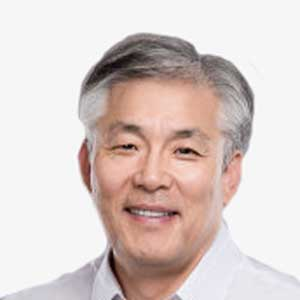
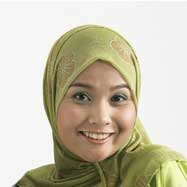
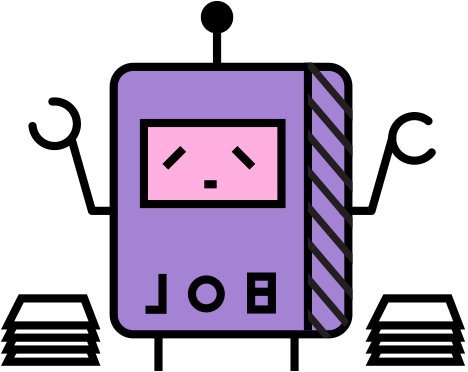
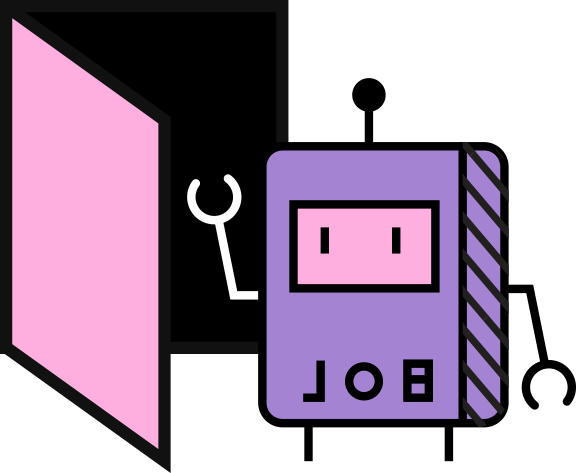
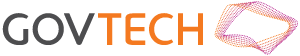
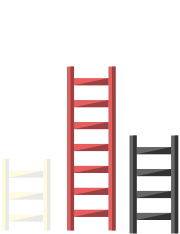
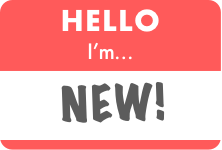
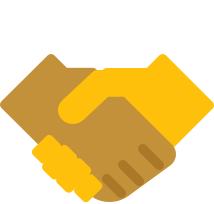
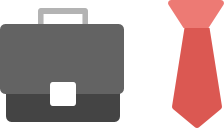
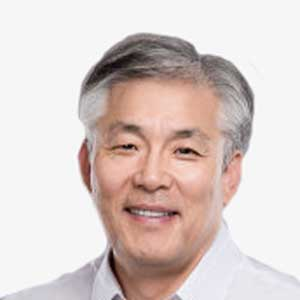
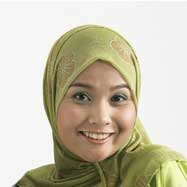
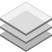
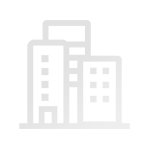
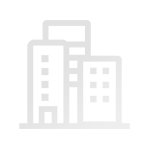
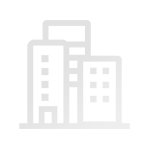
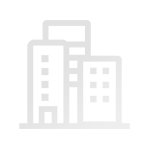
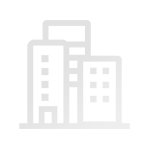
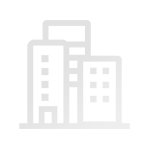
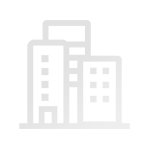
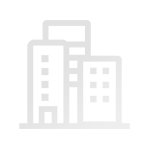
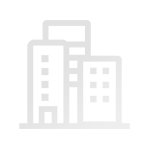
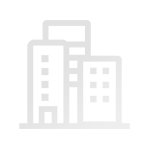
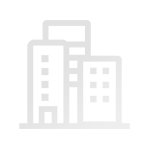
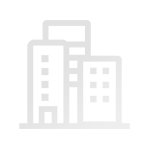
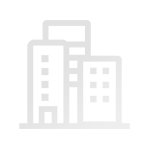
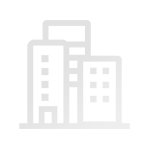
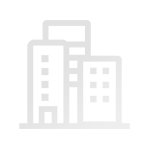
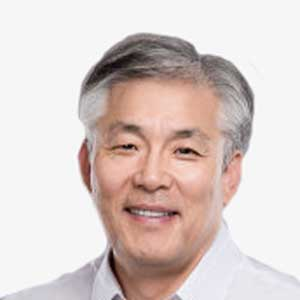
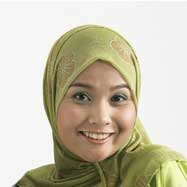
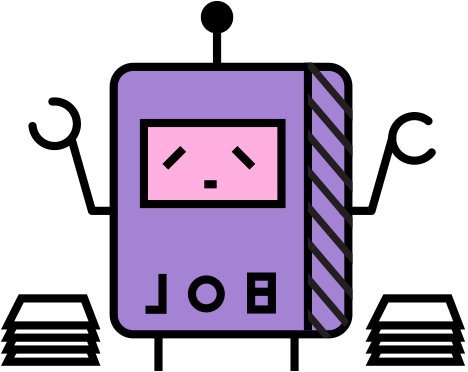
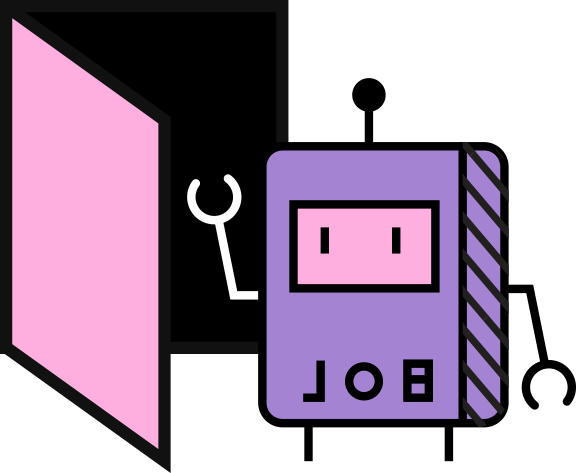
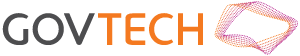
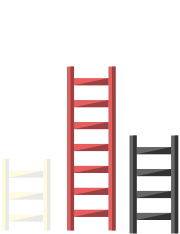
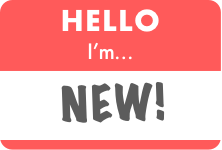
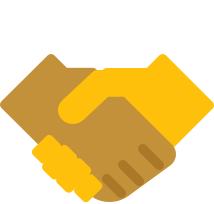
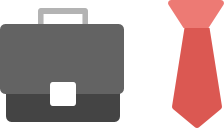
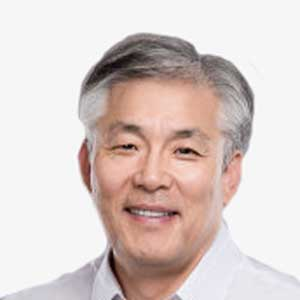
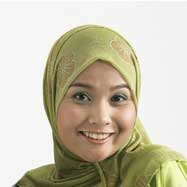
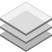
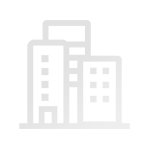
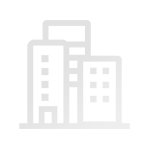
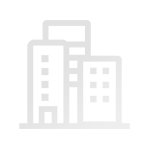
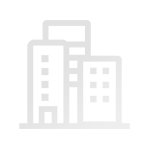
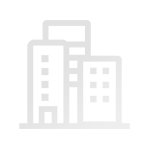
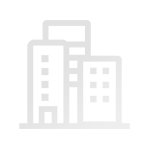
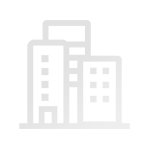
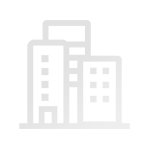
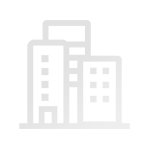
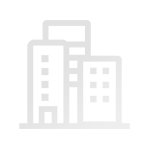
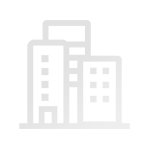
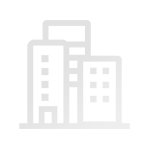
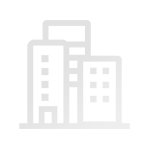
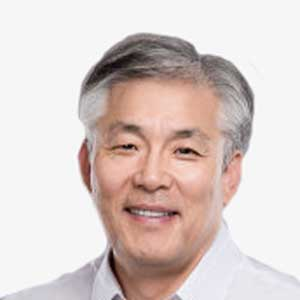
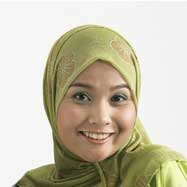
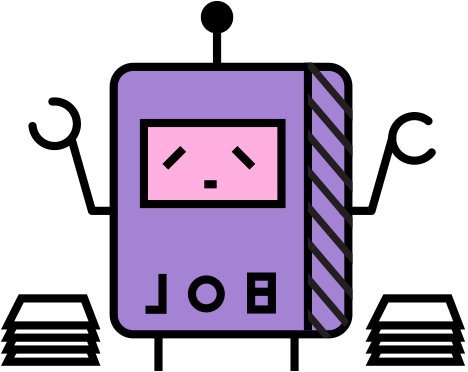
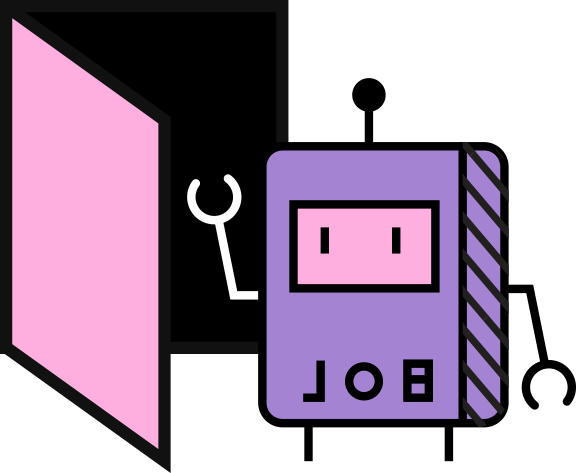
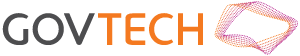
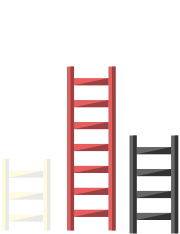
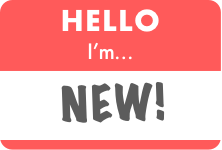
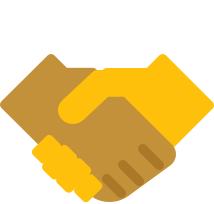
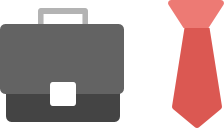
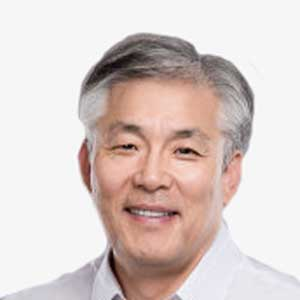
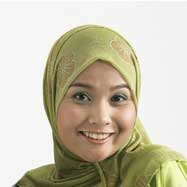
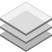
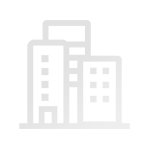
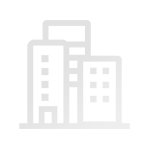
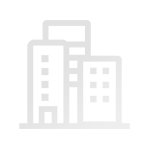
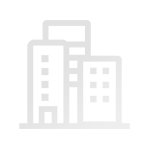
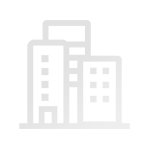
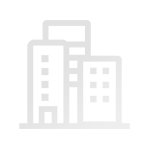
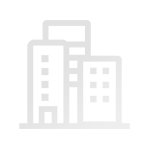
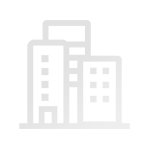
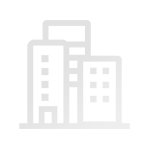
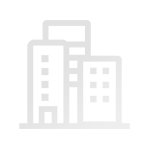
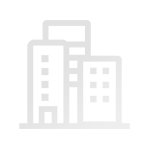
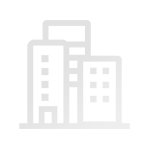
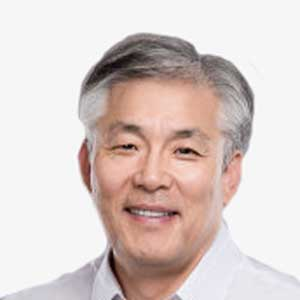
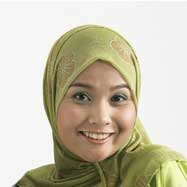
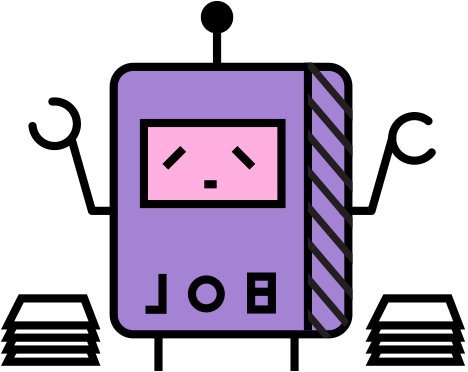
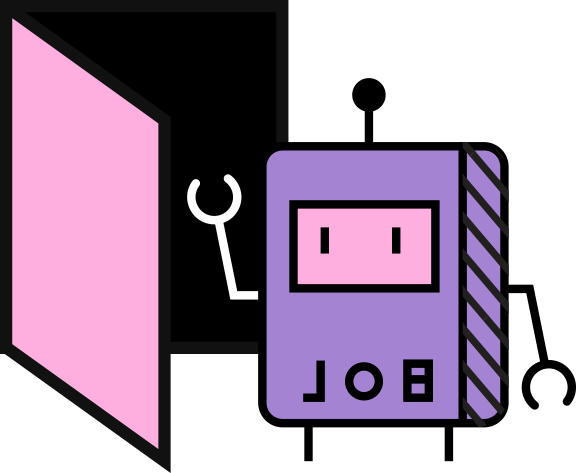
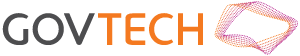
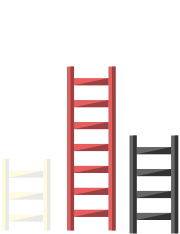
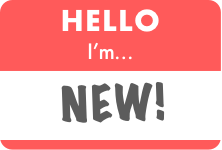
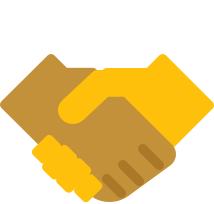
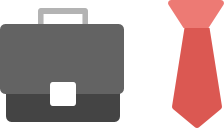
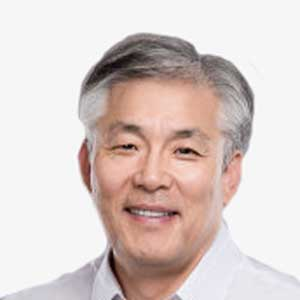
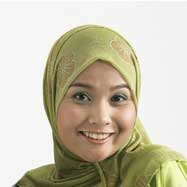
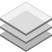
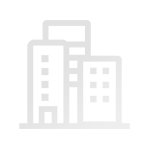
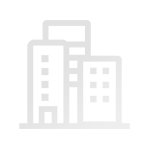
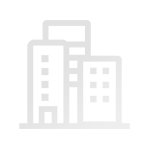
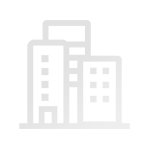
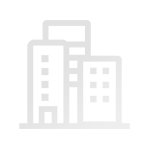
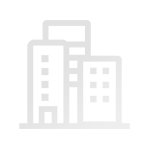
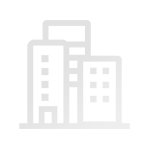
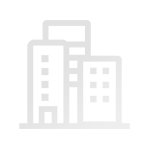
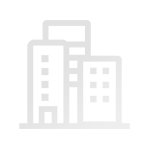
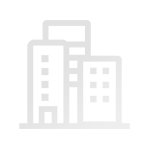
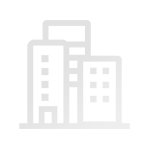
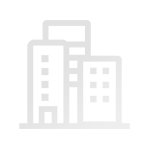
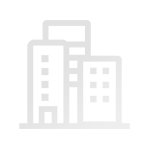
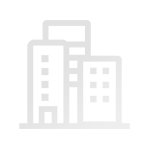
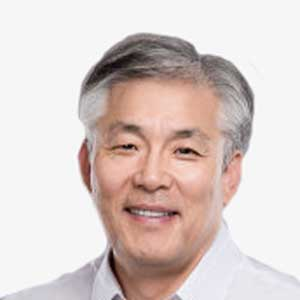
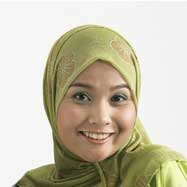
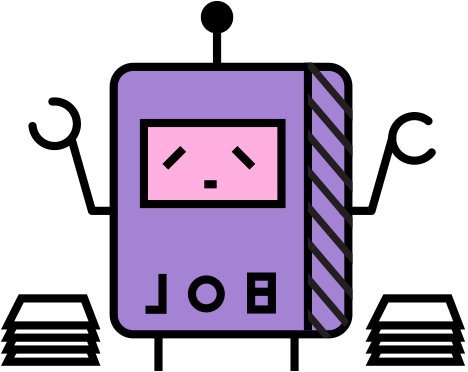
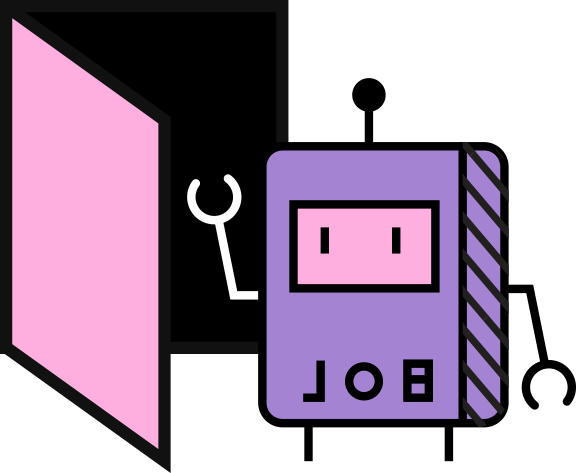
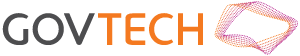
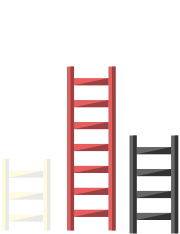
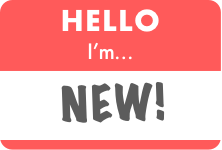
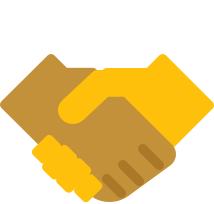
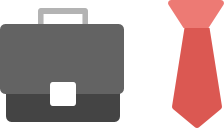
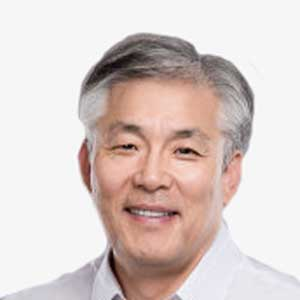
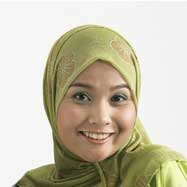
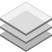

In [13]:
pages[:5]

In [14]:
# Get links from each search page.

In [15]:
links = []
for page in pages:
    soup = BeautifulSoup(page)
    for item in soup.find_all("a", {"class" : "bg-white mb3 w-100 dib v-top pa3 no-underline flex-ns flex-wrap JobCard__card___22xP3"}):
        part_link = item.attrs["href"] 
        link = "https://www.mycareersfuture.sg" + part_link
        links.append(link)

In [16]:
len(links)

1493

In [17]:
links[:5]

['https://www.mycareersfuture.sg/job/postdoctoral-fellow-research-fellow-data-scientist-national-university-singapore-6d73c089695eca94fa8805c4cddd9f72',
 'https://www.mycareersfuture.sg/job/data-scientist-ctrlshift-singapore-dd4961269f59cd6004d9caf75b94de70',
 'https://www.mycareersfuture.sg/job/senior-data-scientist-rio-tinto-commercial-dd32235002939e4040f78734b662ea06',
 'https://www.mycareersfuture.sg/job/senior-consultant-hitachi-consulting-singapore-5193ca946c3bef56dd1154b4bac5bb7e',
 'https://www.mycareersfuture.sg/job/data-science-lead-traveloka-services-02815e03a30f3de4a413614bb97affe1']

In [18]:
# Iterate through the links. Scrape the html code for each job posting.

In [19]:
infos = []
for link in links: 
    driver.get(link)
    sleep(5)
    info = driver.page_source
    infos.append(info)

In [20]:
len(info)

513189

['<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="en"><head>\n  <title>Postdoctoral Fellow/Research Fellow (Data Analytics)/Data Scientist | MyCareersFuture</title>\n  <meta property="og:title" content="MyCareersFuture" />\n  <meta property="og:description" content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs based on your skills, discover suitable jobs you might not have considered before, or find jobs with government support." />\n  <meta property="og:url" content="https://www.mycareersfuture.sg" />\n  <meta property="og:image" content="https://www.mycareersfuture.sg/images/og-mcf-logo.png" />\n  <meta property="og:site_name" content="MyCareersFuture" />\n  <meta property="og:type" content="website" />\n  <meta name="google-site-verification" content="cNK77SoJSM_t-TivaafxeOjn7sqTJDdi7TVwyMDLtLA" />\n  <meta name="description" content="The newest government initiative to help Singaporeans with a sma
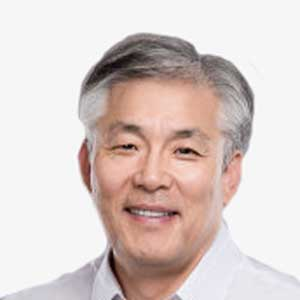
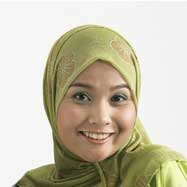
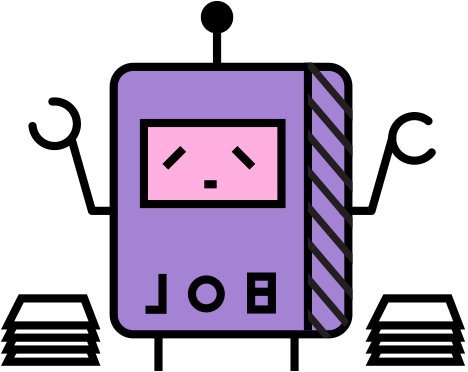
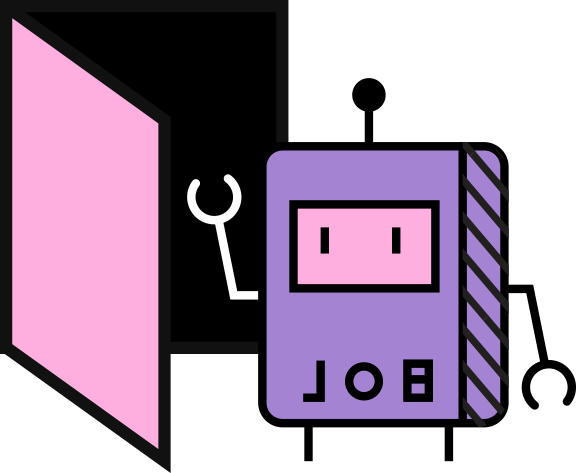
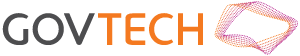
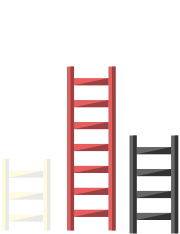
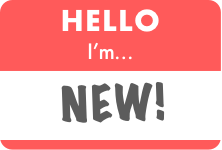
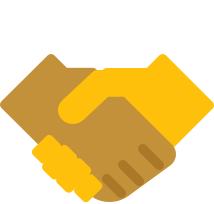
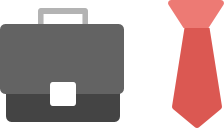
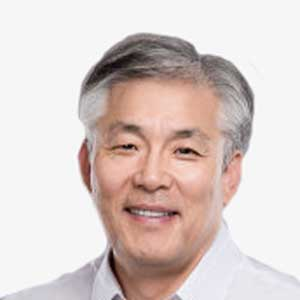
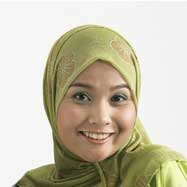
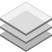
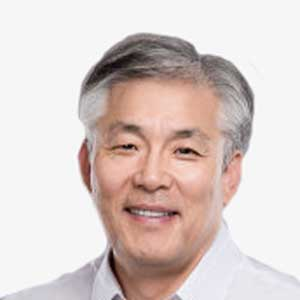
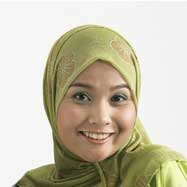
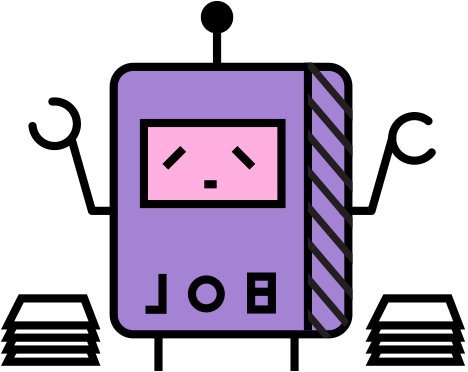
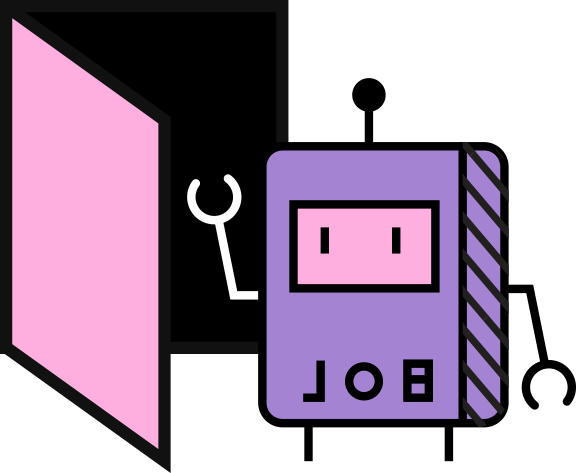
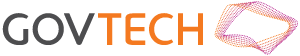
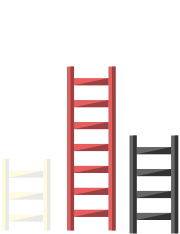
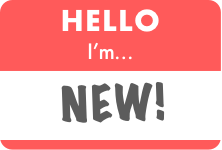
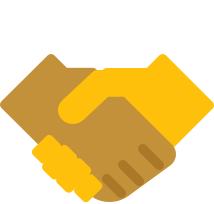
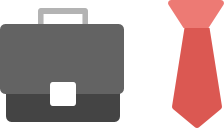
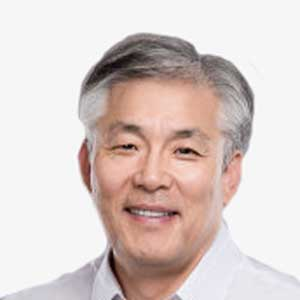
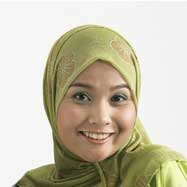
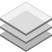
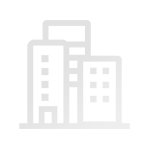
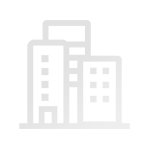
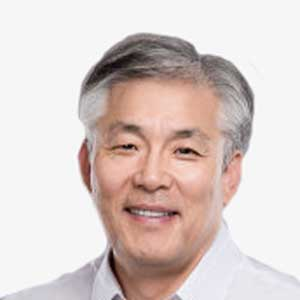
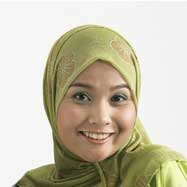
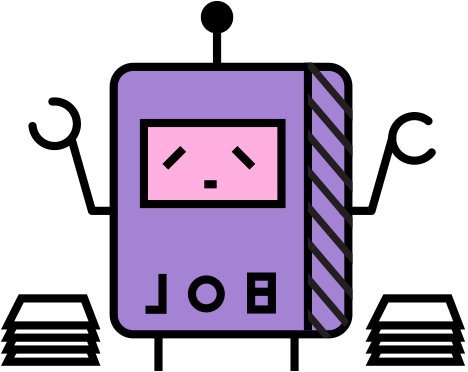
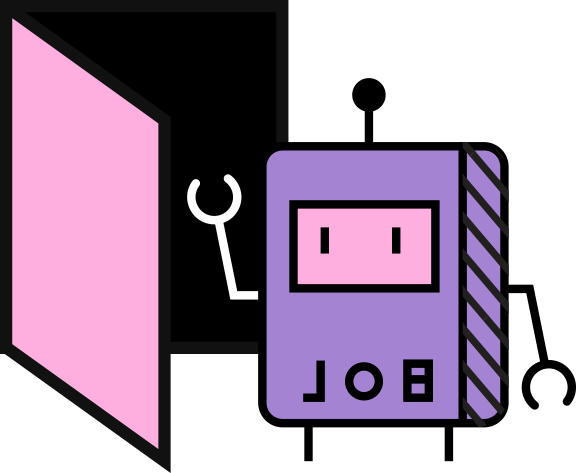
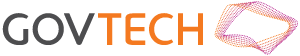
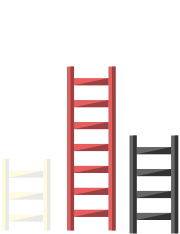
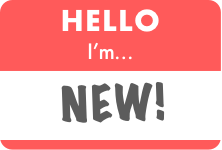
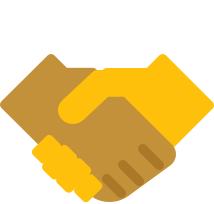
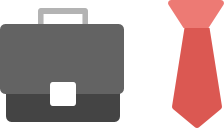
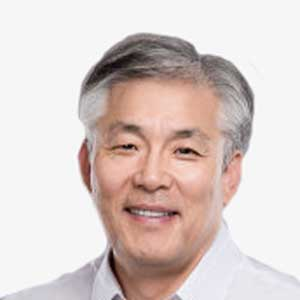
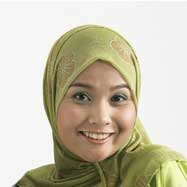
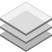
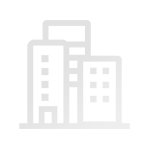
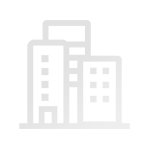
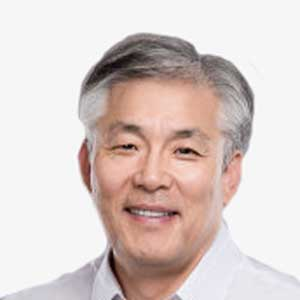
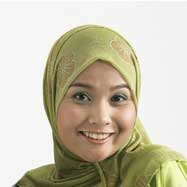
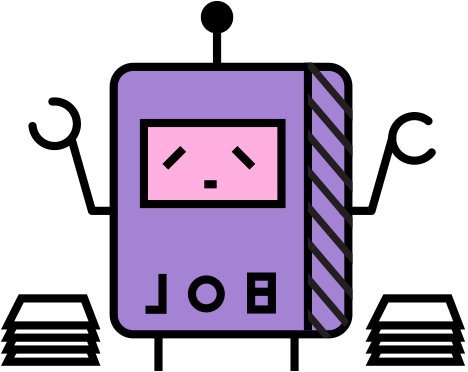
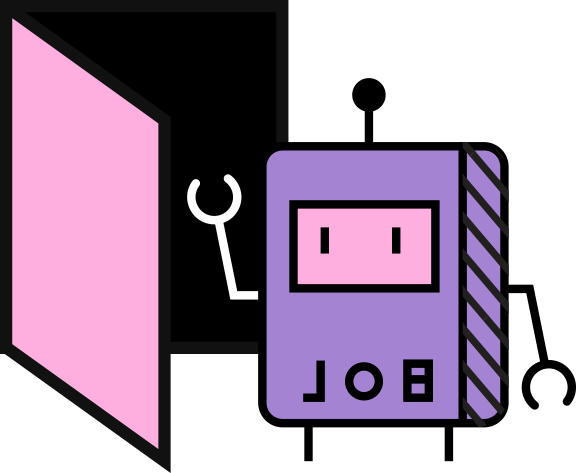
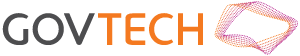
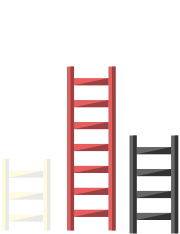
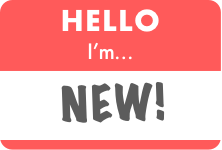
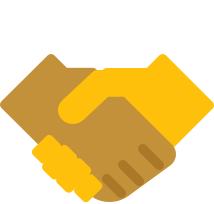
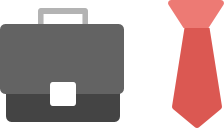
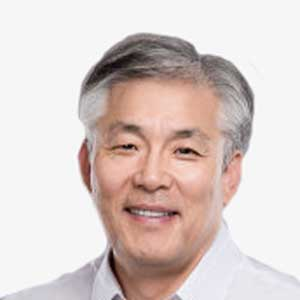
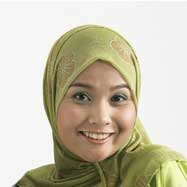
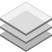
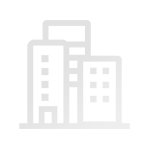
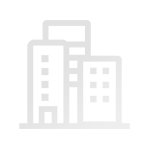
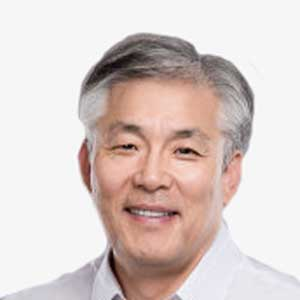
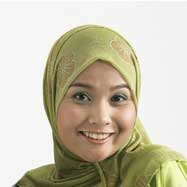
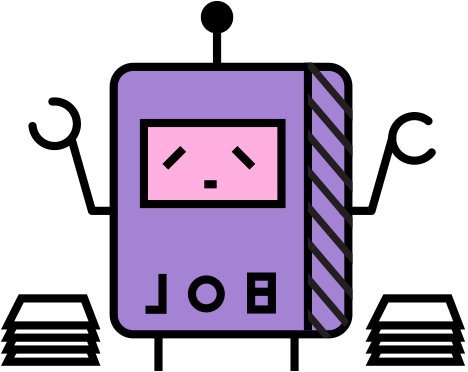
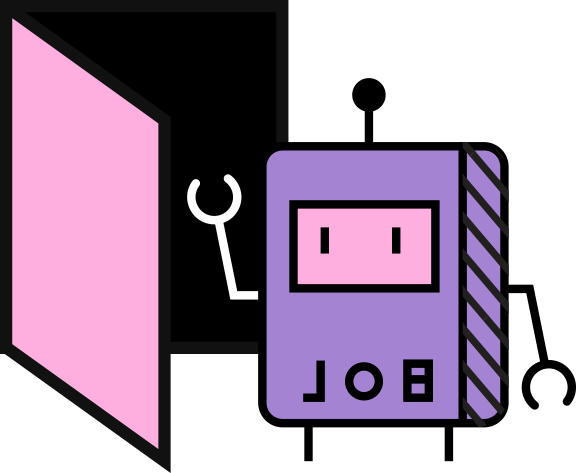
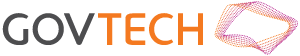
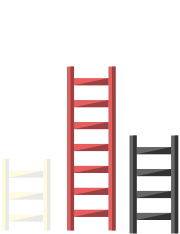
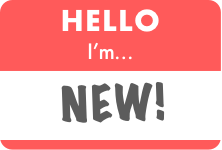
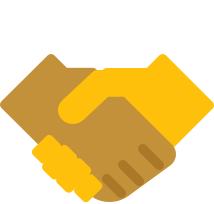
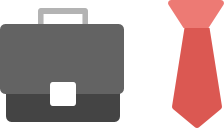
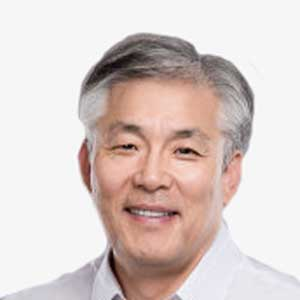
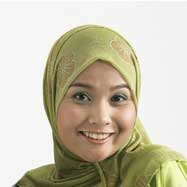
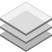
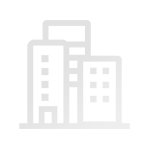
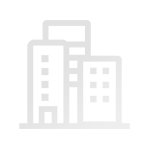

In [21]:
infos[:5]

In [22]:
# Get information for each job posting.

In [23]:
companies = []
positions = []
job_ids = []
locations = []
employment_types = []
job_levels = []
min_experiences = []
job_categories = []
salaries = []
salary_types = []
roles_responsibilities = []
requirements = []

for data in infos:
    soup = BeautifulSoup(data)
    try:
        companies.append(soup.find("p", {"name" : "company"}).text)
    except:
        companies.append(np.nan)
    try:
        positions.append(soup.find("h1", {"id" : "job_title"}).text)
    except:
        positions.append(np.nan)
    try:
        job_ids.append(soup.find("span", {"class" : "black-60 db f6 fw4 mv1"}).text)
    except:
        job_ids.append(np.nan)
    try:
        locations.append(soup.find("p", {"id" : "address"}).text)
    except:
        locations.append(np.nan)
    try:
        employment_types.append(soup.find("p", {"id" : "employment_type"}).text)
    except:
        employment_types.append(np.nan)
    try:
        job_levels.append(soup.find("p", {"id" : "seniority"}).text)
    except:
        job_levels.append(np.nan)
    try:
        min_experiences.append(soup.find("p", {"id" : "min_experience"}).text)
    except:
        min_experiences.append(np.nan)     
    try:
        job_categories.append(soup.find("p", {"id" : "job-categories"}).text)
    except:
        job_categories.append(np.nan)
    try:
        salaries.append(soup.find("div", {"class" : "lh-solid"}).text)
    except:
        salaries.append(np.nan)
    try:    
        salary_types.append(soup.find("span", {"class" : "salary_type dib f5 fw4 black-60 pr1 i pb"}).text)
    except:
        salary_types.append(np.nan)
    try:
        roles_responsibilities.append(soup.find("div", {"class" : "f5 fw4 black-70 lh-copy break-word JobDetails__job_details_page___2hMQp" , "id" : "description-content"}).text)
    except:
        roles_responsibilities.append(np.nan)
    try:
        requirements.append(soup.find("div", {"class" : "f5 fw4 black-70 lh-copy break-word JobDetails__job_details_page___2hMQp" , "id" : "requirements-content"}).text)
    except:
        requirements.append(np.nan)

In [24]:
# Put all information together in a dataframe.

In [25]:
columns = ["company","position","job_id","location","employment_type","job_level",
           "min_experience","job_category","salary","salary_type","role_responsibility",
           "requirement"]
df = pd.DataFrame(columns = columns)
df

Empty DataFrame
Columns: [company, position, job_id, location, employment_type, job_level, min_experience, job_category, salary, salary_type, role_responsibility, requirement]
Index: []

In [26]:
df["company"] = companies
df["position"] = positions
df["job_id"] = job_ids
df["location"] = locations
df["employment_type"] = employment_types
df["job_level"] = job_levels
df["min_experience"] = min_experiences
df["job_category"] = job_categories
df["salary"] = salaries
df["salary_type"] = salary_types
df["role_responsibility"] = roles_responsibilities
df["requirement"] = requirements

In [27]:
df

company  \
0                    NATIONAL UNIVERSITY OF SINGAPORE   
1                       CTRLSHIFT SINGAPORE PTE. LTD.   
2                      RIO TINTO COMMERCIAL PTE. LTD.   
3              HITACHI CONSULTING SINGAPORE PTE. LTD.   
4                        TRAVELOKA SERVICES PTE. LTD.   
5                        TRAVELOKA SERVICES PTE. LTD.   
6                        TRAVELOKA SERVICES PTE. LTD.   
7                        TRAVELOKA SERVICES PTE. LTD.   
8                        TRAVELOKA SERVICES PTE. LTD.   
9         OVERSEA-CHINESE BANKING CORPORATION LIMITED   
10                                    MERCK PTE. LTD.   
11                             RAKUTEN ASIA PTE. LTD.   
12                       EPS COMPUTER SYSTEMS PTE LTD   
13                                 MICROSEC PTE. LTD.   
14                      DATAROBOT SINGAPORE PTE. LTD.   
15                                Company Undisclosed   
16                                   XYPHER PTE. LTD.   
17                      DATAROBOT SINGAPORE PTE. LTD.   
18                      SEPHORA DIGITAL SEA PTE. LTD.   
19                          VALIDUS CAPITAL PTE. LTD.   
20     MANPOWER STAFFING SERVICES (SINGAPORE) PTE LTD   
21                     LAM RESEARCH SINGAPORE PTE LTD   
22                                      DBS BANK LTD.   
23                   ERNST & YOUNG ADVISORY PTE. LTD.   
24                         APPLE SOUTH ASIA PTE. LTD.   
25                      DATAROBOT SINGAPORE PTE. LTD.   
26                  EUROSPORTS TECHNOLOGIES PTE. LTD.   
27              OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
28                    THALES SOLUTIONS ASIA PTE. LTD.   
29                                Company Undisclosed   
...                                               ...   
1463                         MANGOSTEEN BCC PTE. LTD.   
1464                         MACRO SOFTWARE PTE. LTD.   
1465                    ENCORA TECHNOLOGIES PTE. LTD.   
1466                 AIRBUS SINGAPORE PRIVATE LIMITED   
1467                       NEC ASIA PACIFIC PTE. LTD.   
1468                                    CITIBANK N.A.   
1469                              Company Undisclosed   
1470                R SYSTEMS (SINGAPORE) PTE LIMITED   
1471            OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
1472                 Institute of Technical Education   
1473             KELLY SERVICES (SINGAPORE) PTE. LTD.   
1474                 Institute of Technical Education   
1475                    MEGAMIND CONSULTING PTE. LTD.   
1476  GLOBAL BLUE SERVICE COMPANY SINGAPORE PTE. LTD.   
1477                                  JTC Corporation   
1478            TRINITY CONSULTING SERVICES PTE. LTD.   
1479                     GOVERNMENT TECHNOLOGY AGENCY   
1480                     GOVERNMENT TECHNOLOGY AGENCY   
1481                     GOVERNMENT TECHNOLOGY AGENCY   
1482                     GOVERNMENT TECHNOLOGY AGENCY   
1483                     GOVERNMENT TECHNOLOGY AGENCY   
1484                     GOVERNMENT TECHNOLOGY AGENCY   
1485                     GOVERNMENT TECHNOLOGY AGENCY   
1486                     GOVERNMENT TECHNOLOGY AGENCY   
1487                 Institute of Technical Education   
1488                 Institute of Technical Education   
1489                 Institute of Technical Education   
1490                 Institute of Technical Education   
1491                     CENTRAL PROVIDENT FUND BOARD   
1492                             Republic Polytechnic   

                                               position              job_id  \
0     Postdoctoral Fellow / Research Fellow (Data An...   JOB-2019-0065979    
1                                        Data Scientist   JOB-2019-0024152    
2                                 Senior Data Scientist   JOB-2019-0090665    
3                    Senior Consultant (Data Scientist)   JOB-2019-0089896    
4                                     Data Science Lead   JOB-2019-0089680    
5                           Senior Le

In [28]:
df.to_csv("./project4_data.csv")

In [29]:
driver.close()